# Hand Sign Recognition - SIBI (Sistem Isyarat Bahasa Indonesia)

![](assets/SIBI.jpg)


In [1]:
import os
import re
import pandas as pd
import numpy as np
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
data = []
landmarks = []

mp_hands = mp.solutions.hands

with mp_hands.Hands(model_complexity=0,
                   min_detection_confidence=0.5,
                   min_tracking_confidence=0.5) as hands:
    for dirname, _, filenames in os.walk('data\SIBI'):
        for filename in filenames:
            file = os.path.join(dirname, filename)
            
            image = cv2.imread(file)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = hands.process(image)
            
            image_height, image_width, _ = image.shape
            
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    hand_landmarks = hand_landmarks
                    
            x_koordinat = []
            y_koordinat = []
            z_koordinat = []
            for i in range(21):
                x = hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x * image_width
                y = hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y * image_height
                z = hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z * _


                x_koordinat.append(x)
                y_koordinat.append(y)
                z_koordinat.append(z)

            start_point = (round(min(x_koordinat)-1), round(min(y_koordinat)-1))
            end_point = (round(max(x_koordinat)+1), round(max(y_koordinat)+1))

            lebar = end_point[0]-start_point[0]
            tinggi = end_point[1]-start_point[1]

            data_landmarks = []

            for i in range(len(x_koordinat)):
                data_x = (x_koordinat[i] - start_point[0]) / lebar
                data_y = (y_koordinat[i] - start_point[1]) / tinggi
                data_z = z_koordinat[i]

                data_landmarks.append(data_x)
                data_landmarks.append(data_y)
                data_landmarks.append(data_z)

            data_landmarks.append(dirname[-1])
            data.append(data_landmarks)

In [3]:
columns = ['wrist_x', 'wrist_y', 'wrist_z', 'thumb_cmc_x', 'thumb_cmc_y', 'thumb_cmc_z', 'thumb_mcp_x', 'thumb_mcp_y',
          'thumb_mcp_z', 'thumb_ip_x', 'thumb_ip_y', 'thumb_ip_z', 'thumb_tip_x', 'thumb_tip_y', 'thumb_tip_z',
          'index_finger_mcp_x', 'index_finger_mcp_y', 'index_finger_mcp_z', 'index_finger_pip_x', 
          'index_finger_pip_y', 'index_finger_pip_z', 'index_finger_dip_x', 'index_finger_dip_y', 'index_finger_dip_z',
          'index_finger_tip_x', 'index_finger_y', 'index_finger_z', 'middle_finger_mcp_x', 'middle_finger_mcp_y',
          'middle_finger_mcp_z', 'middle_finger_pip_x', 'middle_finger_pip_y', 'middle_finger_pip_z', 'middle_finger_dip_x',
          'middle_finger_dip_y', 'middle_finger_dip_z', 'middle_finger_tip_x', 'middle_finger_tip_y', 'middle_finger_tip_z',
          'ring_finger_mcp_x', 'ring_finger_mcp_y', 'ring_finger_mcp_z', 'ring_finger_pip_x', 'ring_finger_pip_y',
          'ring_finger_pip_z', 'ring_finger_dip_x', 'ring_finger_dip_y', 'ring_finger_dip_z', 'ring_finger_tip_x',
          'ring_finger_tip_y', 'ring_finger_tip_z', 'pinky_mcp_x', 'pinky_mcp_y', 'pinky_mcp_z', 'pinky_pip_x', 'pinky_pip_y',
          'pinky_pip_z', 'pinky_dip_x', 'pinky_dip_y', 'pinky_dip_z', 'pinky_tip_x', 'pinky_tip_y', 'pinky_tip_z', 'kelas']

In [4]:
df = pd.DataFrame(np.array(data), columns=columns)
df.head()

,wrist_x,wrist_y,wrist_z,thumb_cmc_x,thumb_cmc_y,thumb_cmc_z,thumb_mcp_x,thumb_mcp_y,thumb_mcp_z,thumb_ip_x,...,pinky_pip_x,pinky_pip_y,pinky_pip_z,pinky_dip_x,pinky_dip_y,pinky_dip_z,pinky_tip_x,pinky_tip_y,pinky_tip_z,kelas
0,0.3907024383544922,0.996345943874783,1.1824847767627489e-08,0.7700635910034179,0.8476512452476045,-0.08768854290246964,0.9705183029174804,0.5470852566580487,-0.15087369829416275,0.9937914530436198,...,0.00312649408976237,0.2487113129379403,-0.24639858305454254,0.1241790771484375,0.39845346385597163,-0.24088136851787567,0.15264625549316407,0.4789058571187859,-0.2137284055352211,A
1,0.433500282664716,0.9964509210666689,1.7461882606539803e-08,0.8011550033047172,0.8294900365236426,-0.10941654816269875,0.9963244884186371,0.5307138907809218,-0.2003934681415558,0.9967773205427163,...,0.07585529864061015,0.29447814396449495,-0.31221601366996765,0.1764765692301123,0.4920207191916073,-0.2940437123179436,0.14804851691532497,0.5657040812388188,-0.25724440813064575,A
2,0.42155163754396335,0.9966573608055543,5.557862170491035e-09,0.7865582005124251,0.8251629438293114,-0.09639531746506691,0.9864289118355051,0.5096889935182721,-0.1830829605460167,0.9974248118946033,...,0.07207328543011993,0.3122992649506987,-0.32375869899988174,0.17347779221200416,0.49748391783639284,-0.30765940994024277,0.15026782271606895,0.5619539759132299,-0.27600914239883423,A
3,0.3855189005533854,0.9972914722569458,-1.0127563454531696e-08,0.7918540954589843,0.846092482661957,-0.11810968816280365,0.9813259760538737,0.48822504907008024,-0.1940220594406128,0.98973388671875,...,0.061416339874267575,0.39686223247167096,-0.3377296105027199,0.1754045804341634,0.6022241182644349,-0.3546920120716095,0.2447354316711426,0.7087787472073684,-0.3495229035615921,A
4,0.38339430188375806,0.998215682746828,-1.5754732185513376e-08,0.7812492128402467,0.8428304213886113,-0.10403816029429436,0.9626601688445561,0.48394037586774014,-0.16870379447937012,0.9584022400871156,...,0.04344634404258123,0.4335383555685827,-0.300205260515213,0.15019020201667907,0.6331707784371783,-0.32674310356378555,0.22444237603081596,0.7497962759446728,-0.3312980979681015,A


In [5]:
df.to_csv('data/hand_landmarks_sibi.csv', index=False)

In [6]:
df = pd.read_csv('data\hand_landmarks_sibi.csv')
df.head()

,wrist_x,wrist_y,wrist_z,thumb_cmc_x,thumb_cmc_y,thumb_cmc_z,thumb_mcp_x,thumb_mcp_y,thumb_mcp_z,thumb_ip_x,...,pinky_pip_x,pinky_pip_y,pinky_pip_z,pinky_dip_x,pinky_dip_y,pinky_dip_z,pinky_tip_x,pinky_tip_y,pinky_tip_z,kelas
0,0.390702,0.996346,1.182485e-08,0.770064,0.847651,-0.087689,0.970518,0.547085,-0.150874,0.993791,...,0.003126,0.248711,-0.246399,0.124179,0.398453,-0.240881,0.152646,0.478906,-0.213728,A
1,0.433500,0.996451,1.746188e-08,0.801155,0.829490,-0.109417,0.996324,0.530714,-0.200393,0.996777,...,0.075855,0.294478,-0.312216,0.176477,0.492021,-0.294044,0.148049,0.565704,-0.257244,A
2,0.421552,0.996657,5.557862e-09,0.786558,0.825163,-0.096395,0.986429,0.509689,-0.183083,0.997425,...,0.072073,0.312299,-0.323759,0.173478,0.497484,-0.307659,0.150268,0.561954,-0.276009,A
3,0.385519,0.997291,-1.012756e-08,0.791854,0.846092,-0.118110,0.981326,0.488225,-0.194022,0.989734,...,0.061416,0.396862,-0.337730,0.175405,0.602224,-0.354692,0.244735,0.708779,-0.349523,A
4,0.383394,0.998216,-1.575473e-08,0.781249,0.842830,-0.104038,0.962660,0.483940,-0.168704,0.958402,...,0.043446,0.433538,-0.300205,0.150190,0.633171,-0.326743,0.224442,0.749796,-0.331298,A


In [7]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## K-Nearst Neighbors

In [10]:
k_neighbors = 36
metrics = ['euclidean', 'manhattan']

In [11]:
accuracy_total_knn = []
for k in range(1, k_neighbors+1, 1):
    accuracy_k = []
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric=metric)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_k.append(accuracy)
    accuracy_total_knn.append(accuracy_k)

In [12]:
accuracy_knn_df = pd.DataFrame(np.array(accuracy_total_knn), columns=metrics)

In [13]:
k_list = []
for k in range(1, k_neighbors+1):
    k_list.append(k)
    
k_df = pd.DataFrame(k_list, columns=['k'])

In [14]:
accuracy_knn= k_df.join(accuracy_knn_df)
accuracy_knn

,k,euclidean,manhattan
0,1,0.979487,0.979487
1,2,0.979487,0.979487
2,3,0.979487,0.972650
3,4,0.974359,0.974359
4,5,0.964103,0.967521
5,6,0.967521,0.965812
6,7,0.958974,0.965812
7,8,0.965812,0.965812
8,9,0.965812,0.958974
9,10,0.965812,0.955556


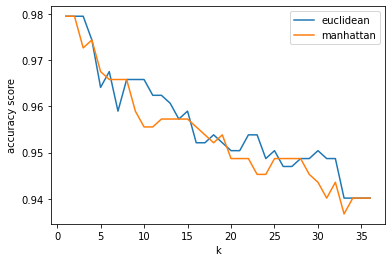

In [15]:
plt.plot(accuracy_knn['k'], accuracy_knn['euclidean'], label='euclidean')
plt.plot(accuracy_knn['k'], accuracy_knn['manhattan'], label='manhattan')

plt.legend()
plt.xlabel('k')
plt.ylabel('accuracy score')
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors=1, weights='distance', metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='distance')

In [17]:
y_pred = knn.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.9794871794871794

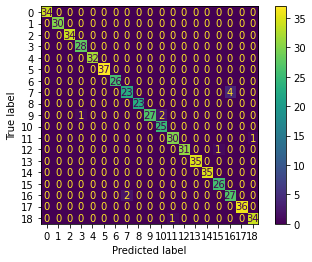

In [19]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## Decision Tree Classifier

In [20]:
criterions = ['gini', 'entropy']

In [21]:
accuracy = []

for criterion in criterions:
    tree = DecisionTreeClassifier(criterion=criterion)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

In [22]:
accuracy

[0.9367521367521368, 0.9452991452991453]

## Random Forest

In [23]:
n_estimator = 54
criterions = ['gini', 'entropy']

In [24]:
accuracy_total_rf = []

for n in range(1, n_estimator+1, 1):
    accuracy_forest = []
    for criterion in criterions:
        forest = RandomForestClassifier(n_estimators=n, criterion=criterion)
        forest.fit(X_train, y_train)
        y_pred = forest.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_forest.append(accuracy)
    accuracy_total_rf.append(accuracy_forest)

In [25]:
accuracy_rf_df = pd.DataFrame(np.array(accuracy_total_rf), columns=criterions)

In [26]:
n_list = []
for n in range(1, n_estimator+1):
    n_list.append(n)
    
n_df = pd.DataFrame(n_list, columns=['n'])

In [27]:
n_list = []
for n in range(1, n_estimator+1):
    n_list.append(n)
    
n_df = pd.DataFrame(n_list, columns=['n'])

In [28]:
accuracy_rf = n_df.join(accuracy_rf_df)
accuracy_rf

,n,gini,entropy
0,1,0.876923,0.861538
1,2,0.897436,0.899145
2,3,0.936752,0.941880
3,4,0.962393,0.936752
4,5,0.950427,0.960684
5,6,0.967521,0.965812
6,7,0.970940,0.969231
7,8,0.967521,0.972650
8,9,0.969231,0.970940
9,10,0.970940,0.974359


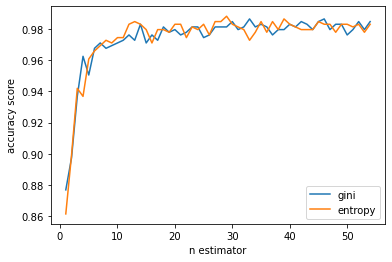

In [29]:
plt.plot(accuracy_rf['n'], accuracy_rf['gini'], label='gini')
plt.plot(accuracy_rf['n'], accuracy_rf['entropy'], label='entropy')

plt.legend()
plt.xlabel('n estimator')
plt.ylabel('accuracy score')
plt.show()

## Recognition

In [30]:
model = RandomForestClassifier(n_estimators=20, criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [32]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

cap = cv2.VideoCapture(1)

with mp_hands.Hands(model_complexity=0,
                  min_detection_confidence=0.5,
                  min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            print('ignoring empty camera frame')
            continue
        
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = hands.process(image)
        
        image_height, image_width, _ = image.shape
        
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                hand_landmarks = hand_landmarks
                mp_drawing.draw_landmarks(image,
                                         hand_landmarks,
                                         mp_hands.HAND_CONNECTIONS,
                                         mp_drawing_styles.get_default_hand_landmarks_style(),
                                         mp_drawing_styles.get_default_hand_connections_style())
        
        x_koordinat = []
        y_koordinat = []
        z_koordinat = []
        for i in range(21):
            x = hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x * image_width
            y = hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y * image_height
            z = hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z * _


            x_koordinat.append(x)
            y_koordinat.append(y)
            z_koordinat.append(z)

        start_point = (round(min(x_koordinat)-1), round(min(y_koordinat)-1))
        end_point = (round(max(x_koordinat)+1), round(max(y_koordinat)+1))

        lebar = end_point[0]-start_point[0]
        tinggi = end_point[1]-start_point[1]

        data_landmarks = []

        for i in range(len(x_koordinat)):
            data_x = (x_koordinat[i] - start_point[0]) / lebar
            data_y = (y_koordinat[i] - start_point[1]) / tinggi
            data_z = z_koordinat[i]

            data_landmarks.append(data_x)
            data_landmarks.append(data_y)
            data_landmarks.append(data_z)
        
        predict = le.inverse_transform(model.predict([data_landmarks]))
        #predict = str(model.predict([data_landmarks]))
        predict = 'predict : '+predict[0]
        #print(predict)
        

        #print(start_point, end_point)

        color = (255, 0, 0)

        thickness = 2
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        #cv2.rectangle(image, start_point, end_point, color, thickness)
        cv2.rectangle(image, (50, 50), (250, 100), color, -1)
        cv2.putText(image, predict, (50, 85), font, 1, (0, 0, 0), 2)
        
        #cv2.putText(image, predict, (200, 200), font, 4, (0, 0, 0), 10)
        
        cv2.imshow('hand tracking', image)
        key = cv2.waitKey(1)
  
        # This statement just runs once per frame.
        # Basically, if we get a key, and that key is a q,
        if key == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

## example

predict : B


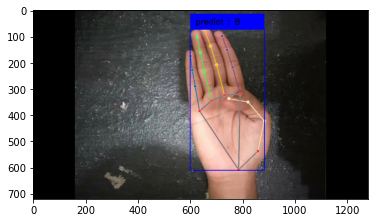

In [31]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

with mp_hands.Hands(model_complexity=0,
                  min_detection_confidence=0.5,
                  min_tracking_confidence=0.5) as hands:
            
    image = cv2.imread('data\SIBI\B\WIN_20230122_07_43_33_Pro.jpg')
    
    image_height, image_width, _ = image.shape
    
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(image,
                                      hand_landmarks,
                                      mp_hands.HAND_CONNECTIONS,
                                      mp_drawing_styles.get_default_hand_landmarks_style(),
                                      mp_drawing_styles.get_default_hand_connections_style())
    
    x_koordinat = []
    y_koordinat = []
    z_koordinat = []
    for i in range(21):
        x = hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x * image_width
        y = hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y * image_height
        z = hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z * _


        x_koordinat.append(x)
        y_koordinat.append(y)
        z_koordinat.append(z)

    start_point = (round(min(x_koordinat)-1), round(min(y_koordinat)-1))
    end_point = (round(max(x_koordinat)+1), round(max(y_koordinat)+1))

    lebar = end_point[0]-start_point[0]
    tinggi = end_point[1]-start_point[1]

    data_landmarks = []

    for i in range(len(x_koordinat)):
        data_x = (x_koordinat[i] - start_point[0]) / lebar
        data_y = (y_koordinat[i] - start_point[1]) / tinggi
        data_z = z_koordinat[i]

        data_landmarks.append(data_x)
        data_landmarks.append(data_y)
        data_landmarks.append(data_z)
        
    predict = le.inverse_transform(model.predict([data_landmarks]))
    predict = 'predict : '+predict[0]
    print(predict)
    
    
    color = (255, 0, 0)
    
    thickness = 2
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    cv2.rectangle(image, start_point, end_point, color, thickness)
    
    cv2.rectangle(image, (round(min(x_koordinat)), round(min(y_koordinat))-60), (round(max(x_koordinat)), round(min(y_koordinat))), color, -1)
    cv2.putText(image, predict, (round(min(x_koordinat))+20, round(min(y_koordinat))-20), font, 1, (0, 0, 0), 2)
    
    
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))